<img src="fireblaze.jpg" width=250 height=200 />

## <p style="font-family: Arial; font-size:1.4em;color:red; style='background :yellow'"> Assignment</p>


### The problem statement

* **Classify the private and public universities by using K-Means clustering**

<span style='color:Red'> **About The Dataset** </span>

* **private:** A factor with levels No and Yes indicating private or public university.

* **apps:** Number of applications received.

* **accept:** Number of applications accepted. 

* **enroll:** Number of new students enrolled.  

* **top10perc:** Pct. new students from top 10% of H.S. class.

* **top25perc:** Pct. new students from top 25% of H.S. class.

* **f_undergrad:** Number of full-time undergraduates.

* **p_undergrad:** Number of part time undergraduates. 

* **outstate:** Out-of-state tuition.

* **room_board:** Room and board costs

* **Books:** Estimated book costs

* **Personal:**	Estimated personal spending

* **PhD:** Pct. of faculty with Ph.D.’s

* **Terminal:**	Pct. of faculty with terminal degree

* **S.F.Ratio:** Student/faculty ratio

* **perc.alumni:**	Pct. alumni who donate

* **Expend:** Instructional expenditure per student

* **Grad.Rate:** Graduation rate

<span style='color:Blue'> **Import required libraries** </span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<span style='color:Blue'> **Question - 1.Load the Dataset & display the upper some records .** </span>

In [2]:
df=pd.read_csv('college_data.csv')

In [3]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# 1. Exploratory data analysis

<span style='color:Blue'> **Question - 2. Explore the data to gain the insights from it.** </span>


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

#### <span style='color:Blue'> **Question - 3. Retrive some random sample records from the dataframe.** </span>

In [17]:
df.sample(5)

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
767,No,2320,1805,769,24,61,3395,670,6400,3392,580,2150,71,80,12.8,26,6729,59
387,Yes,3708,1678,722,41,66,2852,153,7050,5490,250,600,71,74,17.8,10,8122,83
728,Yes,7654,5259,1254,62,93,4879,1274,18350,5775,768,1512,91,98,3.9,31,45702,90
650,No,1757,979,394,32,74,2033,1078,5972,3420,600,750,77,83,13.0,11,7011,37
587,No,1500,1242,611,12,36,2024,292,7070,2439,400,779,95,94,17.1,17,7744,84


#### <span style='color:Blue'> **Question - 4.Retrive 11 sample records from the dataframe.** </span>

In [18]:
df.sample(11)

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
542,Yes,3713,1237,443,47,83,1971,107,7000,5565,660,2400,73,80,12.5,18,9988,65
528,Yes,2925,1598,632,51,88,2479,95,18820,6390,500,1050,85,97,10.3,44,21199,90
435,Yes,776,765,351,22,44,1419,228,6400,3150,500,1900,58,64,16.2,8,6578,45
120,Yes,1006,742,275,29,60,1127,205,13925,4390,500,2200,73,86,12.7,32,10141,67
331,Yes,1286,1005,363,16,37,1363,74,13900,4300,500,900,75,81,14.0,32,8024,72
414,Yes,1127,884,308,30,64,1310,766,11718,7398,450,1800,73,87,16.4,33,8871,76
203,No,11651,8683,3023,50,90,18906,3242,6680,4060,600,1020,80,89,23.1,15,7250,58
478,Yes,560,392,270,11,31,743,118,8734,3362,600,625,56,78,11.3,27,6422,68
88,Yes,1160,991,352,19,55,1357,737,12200,3880,480,930,74,81,17.8,25,7666,79
419,No,5891,4931,1973,23,48,11249,2682,6746,3728,620,2342,78,83,21.7,7,6157,41


<span style='color:Blue'> **Question - 5.How to verify missing values present in the variables.**</span>

In [7]:
df.isnull().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

# 2. Exploratory Data Analysis (EDA)

<span style='color:Blue'> **Question - 6. How many students give the room based on grade. Plot the scatter plot and classify based on universities.**</span>

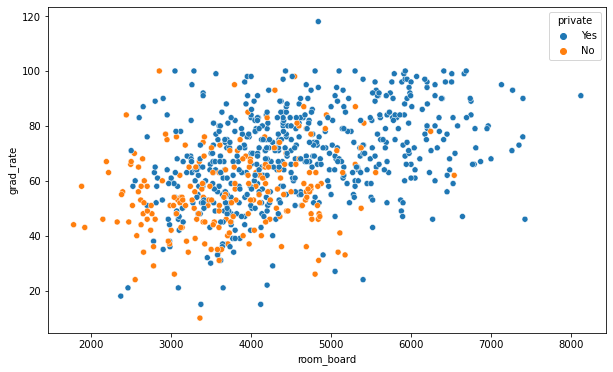

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_board', y='grad_rate', data=df, hue='private')
plt.show()

<span style='color:Blue'> **Question - 7. How many students out side station join the full time undergraduates,plot the scatter plot based on unversities.**</span>

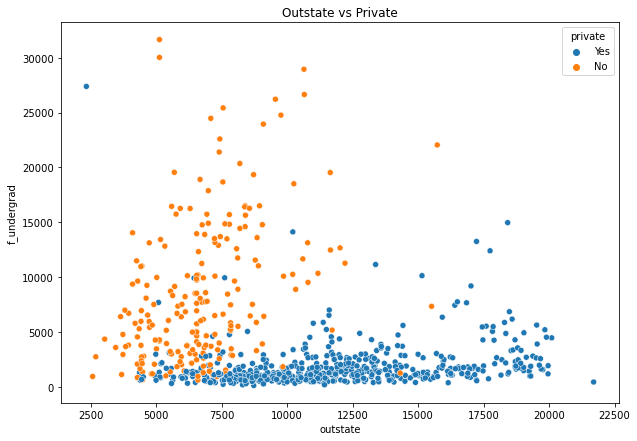

In [9]:
#write observation and code here
plt.figure(figsize=(10,7))
sns.scatterplot(data=df,x='outstate',y='f_undergrad',hue='private')
plt.title('Outstate vs Private')
plt.show()

<span style='color:Blue'> **Question - 8. Plot the scatter plot of private vs non private universities based on outstate students.**</span>

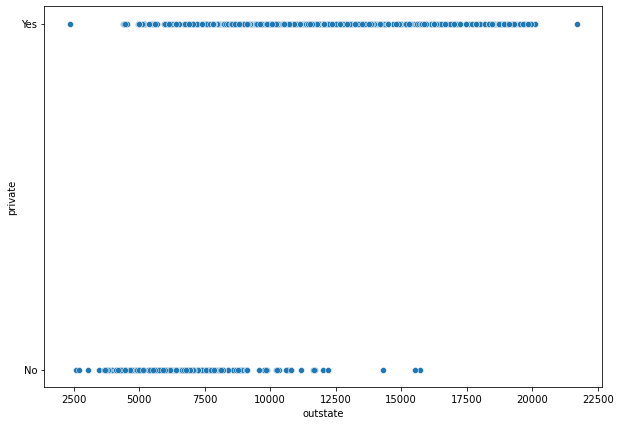

In [10]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='outstate',y='private',data=df)
plt.show()

<span style='color:Blue'> **Question - 9. Plot the scatter plot based on grid rate vs private and non-private college.**</span>

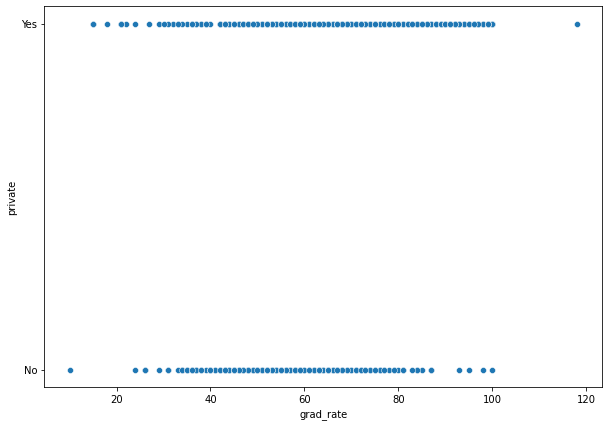

In [11]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='grad_rate',y='private',data=df)
plt.show()

<span style='color:Blue'> **Question - 10. What is the name of that school, who seems to be a private school with graduation rate higher than 100%..**</span>

In [12]:
df[df['grad_rate']>100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


<span style='color:Blue'> **Question - 11.How to handel the data if the dataset is not in the same range?.**</span>

In [13]:
from sklearn.preprocessing import StandardScaler

In [44]:
SS = StandardScaler()

In [45]:
df = SS.fit_transform(df)

In [46]:
df

array([[ 6.12553050e-01, -3.46881819e-01, -3.21205453e-01, ...,
        -8.67574189e-01, -5.01910084e-01, -3.18251941e-01],
       [ 6.12553050e-01, -2.10884040e-01, -3.87029908e-02, ...,
        -5.44572203e-01,  1.66109850e-01, -5.51261842e-01],
       [ 6.12553050e-01, -4.06865631e-01, -3.76317928e-01, ...,
         5.85934748e-01, -1.77289956e-01, -6.67766793e-01],
       ...,
       [ 6.12553050e-01, -2.33895071e-01, -4.23771558e-02, ...,
        -2.21570217e-01, -2.56241250e-01, -9.59029170e-01],
       [ 6.12553050e-01,  1.99171118e+00,  1.77256262e-01, ...,
         2.12019418e+00,  5.88797079e+00,  1.95359460e+00],
       [ 6.12553050e-01, -3.26765760e-03, -6.68715889e-02, ...,
         4.24433755e-01, -9.87115613e-01,  1.95359460e+00]])

#### <span style='color:Blue'> **Question - 12. Use the histogram for visualization, grade rate vs private and non-private college**</span>

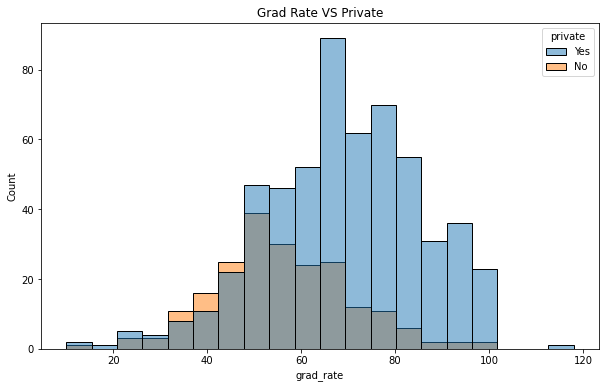

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='grad_rate',hue='private',edgecolor='k')
plt.title('Grad Rate VS Private')
plt.show()

#### <span style='color:Blue'> **Question - 13. Check the relation between the number of application recieved vs number of application accepted**</span>

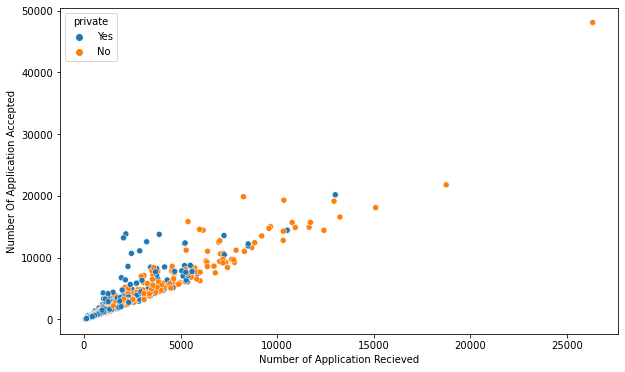

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,y='apps',x='accept',hue='private')
plt.xlabel('Number of Application Recieved')
plt.ylabel('Number Of Application Accepted')
plt.show()

#### <span style='color:Blue'> **Question - 14.Manage the categorical data**</span>

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
LE= LabelEncoder()

In [23]:
df['private']=LE.fit_transform(df['private'])
df

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


#### <span style='color:Blue'> **Question - 15.Which is the highest grade rate**</span>

In [24]:
df.grad_rate.max()

118

#### <span style='color:Blue'> **Question - 16.Transorm your data with any transformation technique**</span>

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
df1 = np.log(df)

In [27]:
df1

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,0.0,7.414573,7.116394,6.580639,3.135494,3.951244,7.967280,6.285998,8.914626,8.101678,6.109248,7.696213,4.248495,4.356709,2.895912,2.484907,8.859505,4.094345
1,0.0,7.689829,7.562162,6.238325,2.772589,3.367296,7.894691,7.112327,9.415727,8.771835,6.620073,7.313220,3.367296,3.401197,2.501436,2.772589,9.261699,4.025352
2,0.0,7.264030,7.000334,5.817111,3.091042,3.912023,6.943122,4.595120,9.328123,8.229511,5.991465,7.060476,3.970292,4.189655,2.557227,3.401197,9.075093,3.988984
3,0.0,6.033086,5.855072,4.919981,4.094345,4.488636,6.234411,4.143135,9.469623,8.603371,6.109248,6.774224,4.521789,4.574711,2.041220,3.610918,9.853036,4.077537
4,0.0,5.262690,4.983607,4.007333,2.772589,3.784190,5.517453,6.767343,8.930626,8.323608,6.684612,7.313220,4.330733,4.276666,2.476538,0.693147,9.298534,2.708050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,-inf,7.694848,7.323171,6.297109,1.386294,3.258097,8.035603,7.615298,8.824237,8.268732,6.214608,7.090077,4.094345,4.094345,3.044522,2.639057,8.404920,3.688879
773,0.0,7.580189,7.498316,6.543912,3.178054,3.850148,7.954723,7.009409,9.351840,8.509161,6.396930,7.130899,4.290459,4.317488,2.587764,3.433987,9.125762,4.418841
774,0.0,7.648263,7.557473,6.543912,3.526361,4.110874,7.934872,5.111988,8.839277,8.342840,6.424869,6.660575,4.204693,4.317488,2.667228,2.995732,9.026778,3.891820
775,0.0,9.278466,7.805067,7.183112,4.553877,4.595120,8.559678,4.418841,9.895455,8.781095,6.445720,7.656810,4.564348,4.564348,1.757858,3.891820,10.606238,4.595120


#### <span style='color:Blue'> **Question - 17.Highest number of room / board class**</span>

In [28]:
df.room_board.max()

8124

# 3. Clustering Model

<span style='color:Blue'> **Import the clustering libraries** </span>

In [29]:
from sklearn.cluster import KMeans

<span style='color:Blue'> **Question - 18. Train your clustering model using all the data except the Private label.**</span>

In [30]:
X= df

In [31]:
X

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,0,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,1,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,1,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [32]:
WCSS=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++',random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
    print(WCSS)

[72040559768.0981]
[72040559768.0981, 48356202397.32207]
[72040559768.0981, 48356202397.32207, 32365874710.06131]
[72040559768.0981, 48356202397.32207, 32365874710.06131, 25519276404.943684]
[72040559768.0981, 48356202397.32207, 32365874710.06131, 25519276404.943684, 20748753404.476215]
[72040559768.0981, 48356202397.32207, 32365874710.06131, 25519276404.943684, 20748753404.476215, 17759717951.860027]
[72040559768.0981, 48356202397.32207, 32365874710.06131, 25519276404.943684, 20748753404.476215, 17759717951.860027, 15716350161.941622]
[72040559768.0981, 48356202397.32207, 32365874710.06131, 25519276404.943684, 20748753404.476215, 17759717951.860027, 15716350161.941622, 14371926795.810024]
[72040559768.0981, 48356202397.32207, 32365874710.06131, 25519276404.943684, 20748753404.476215, 17759717951.860027, 15716350161.941622, 14371926795.810024, 13235642980.579409]
[72040559768.0981, 48356202397.32207, 32365874710.06131, 25519276404.943684, 20748753404.476215, 17759717951.860027, 1571635

<span style='color:Blue'> **Question - 19. Find out best value of K by using graph**</span>

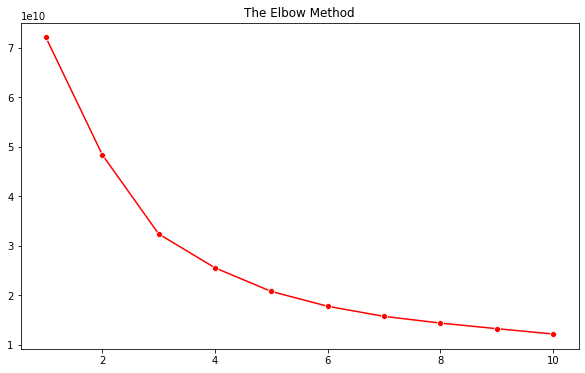

In [33]:
plt.figure(figsize=(10,6))
sns.lineplot(range(1,11),WCSS, marker='o', color='red')
plt.title('The Elbow Method')
plt.show()

# 4. Evaluation

<span style='color:Blue'> **Question - 20. Model is perfectly classified? If yes how to evaluate? Which method used?**</span>

In [34]:
from sklearn.metrics import silhouette_score

In [43]:
silhouette_score(X,y_means,metric ='euclidean')

0.4759356715031701

<span style='color:Blue'> **Question - 21. What is f1-score?**</span>

# 5. Improve the Accuracy

<span style='color:Blue'> **Question - 22. What was the best 'K' value? Use these values and train the model?**</span>

In [35]:
kmeans=KMeans(n_clusters = 3,init='k-means++',random_state=42)
y_means = kmeans.fit_predict(X)

In [36]:
y_means

array([0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 2, 0,
       0, 0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,

<span style='color:Blue'> **Question - 23. What are the cluster center vectors?**</span>

In [37]:
kmeans.cluster_centers_

array([[7.61061947e-01, 1.70182301e+03, 1.23653451e+03, 4.91520354e+02,
        2.18194690e+01, 4.97769912e+01, 2.22618053e+03, 6.56030088e+02,
        9.28193982e+03, 4.14370619e+03, 5.37015929e+02, 1.32979646e+03,
        6.75787611e+01, 7.51433628e+01, 1.46362832e+01, 2.09274336e+01,
        7.83074690e+03, 6.28070796e+01],
       [8.43373494e-02, 1.06216145e+04, 7.30063855e+03, 2.93942169e+03,
        3.20000000e+01, 6.34698795e+01, 1.54825060e+04, 3.17455422e+03,
        8.23585542e+03, 4.13487952e+03, 5.94349398e+02, 1.88833735e+03,
        8.41566265e+01, 8.95542169e+01, 1.64072289e+01, 1.58072289e+01,
        9.44095181e+03, 6.05060241e+01],
       [9.92248062e-01, 3.79185271e+03, 2.04663566e+03, 6.53937984e+02,
        4.98372093e+01, 7.72248062e+01, 2.57355039e+03, 2.35829457e+02,
        1.69343256e+04, 5.43727907e+03, 5.74604651e+02, 1.03575194e+03,
        8.75193798e+01, 9.33333333e+01, 1.02046512e+01, 3.51627907e+01,
        1.78138140e+04, 8.02868217e+01]])

<span style='color:Blue'> **Question - 24. Indentify the summary of prediction results.**</span>

#write observation and code here
Not solw

<span style='color:Blue'> **Question - 25. It is possible to seperate out the dataset in two different classes?**</span>

NOTE:- Create a two seperate clusters based on class.

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA(n_components = 2)

In [40]:
pca.fit(X)

PCA(n_components=2)

In [41]:
pca1= pca.transform(X)

In [42]:
pca1

array([[-2551.83783727, -3445.94721665],
       [ -743.72956064,  2227.36355805],
       [-3373.55622543,   674.25246151],
       ...,
       [-1838.20683109, -2662.64945636],
       [15023.18634781, 27968.56100798],
       [-2286.58217384, -6915.50729917]])